In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Sample Data
clients_data = np.array([[2000, 60], [2500, 45], [1800, 75], [2200, 50], [2100, 62], [2300, 70], [1900, 55], [2000, 65]])
weight_loss = np.array([3, 2, 4, 3, 3.5, 4.5, 3.7, 4.2])

In [3]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(clients_data, weight_loss, test_size=0.25, random_state=42)


In [6]:
# creating a bagging model
base_estimator = DecisionTreeRegressor(max_depth=4)
model = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

In [7]:
# training the model
model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4), random_state=42)

In [10]:
# prediction and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [11]:
# displaying prediction and evaluation
print(f"True weight loss {y_test}")
print(f"Predicted weight loss {y_pred}")
print(f"Mean Squared Error {mse:.2f}")

True weight loss [2.  4.5]
Predicted weight loss [3.1  3.96]
Mean Squared Error 0.75


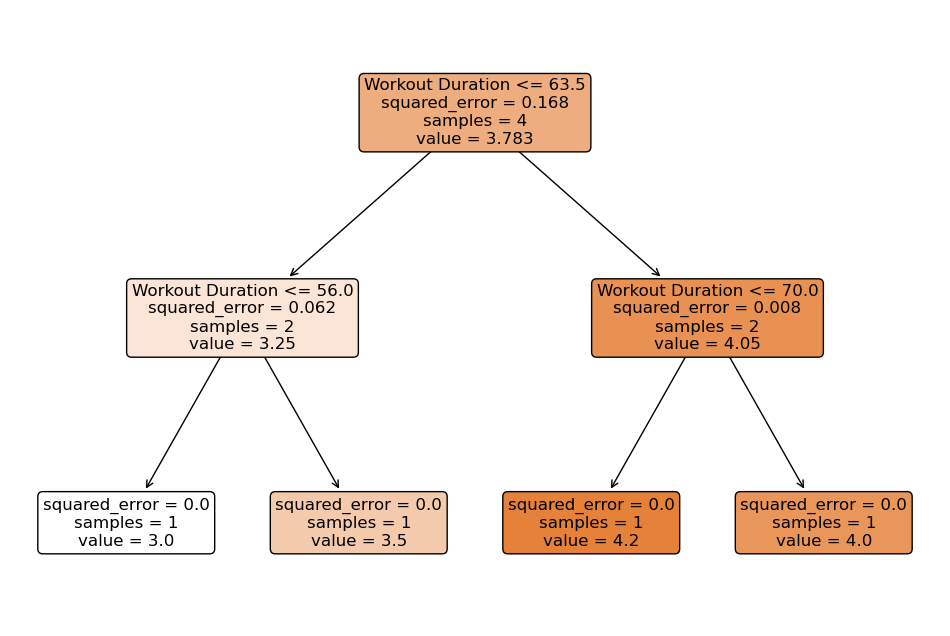

In [14]:
# visualize one of the base estimator
plt.figure(figsize=(12, 8))
tree = model.estimators_[0]
plt.title('One of the base decision tree from base estimator')
plot_tree(tree, filled=True, rounded=True, feature_names=['Calorie Intake', 'Workout Duration'])
plt.show()